<center><h1> Breast Cancer Prediction with SVM & KNN </h1></center>


# Import Libraries


In [14]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data splitting
from sklearn.model_selection import train_test_split

# Data modeling
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics


# warnings
import warnings
warnings.simplefilter(action='ignore')


# Load data

In [15]:
# reading data into dataframe
df = pd.read_csv(r'C:\Users\User\Music\DL and ML Practical Tutorials - Package\Python myprojects\Breast cancer\data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
nRow, nCol= df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 569 rows and 33 columns


In [17]:
# lists name of columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Attribute Information:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)
- 3-32)

- Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)




# Data Preprocessing

In [18]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [11]:
# Find the total number of missing values in the dataframe
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [22]:
# Drop the "Unnamed: 32" column containing all null values  and id column
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [23]:
df.describe().T[['mean']]

,mean
radius_mean,14.127292
texture_mean,19.289649
perimeter_mean,91.969033
area_mean,654.889104
smoothness_mean,0.096360
compactness_mean,0.104341
concavity_mean,0.088799
concave points_mean,0.048919
symmetry_mean,0.181162
fractal_dimension_mean,0.062798


In [12]:
# categorical and numerical features
col = list(df.columns)
col.remove('diagnosis')
categorical_features = ['diagnosis']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : diagnosis
Numerical Features : radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst


In [13]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
# 1 : M and 0 : B
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis'] 


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Exploratory Data Analysis (EDA)

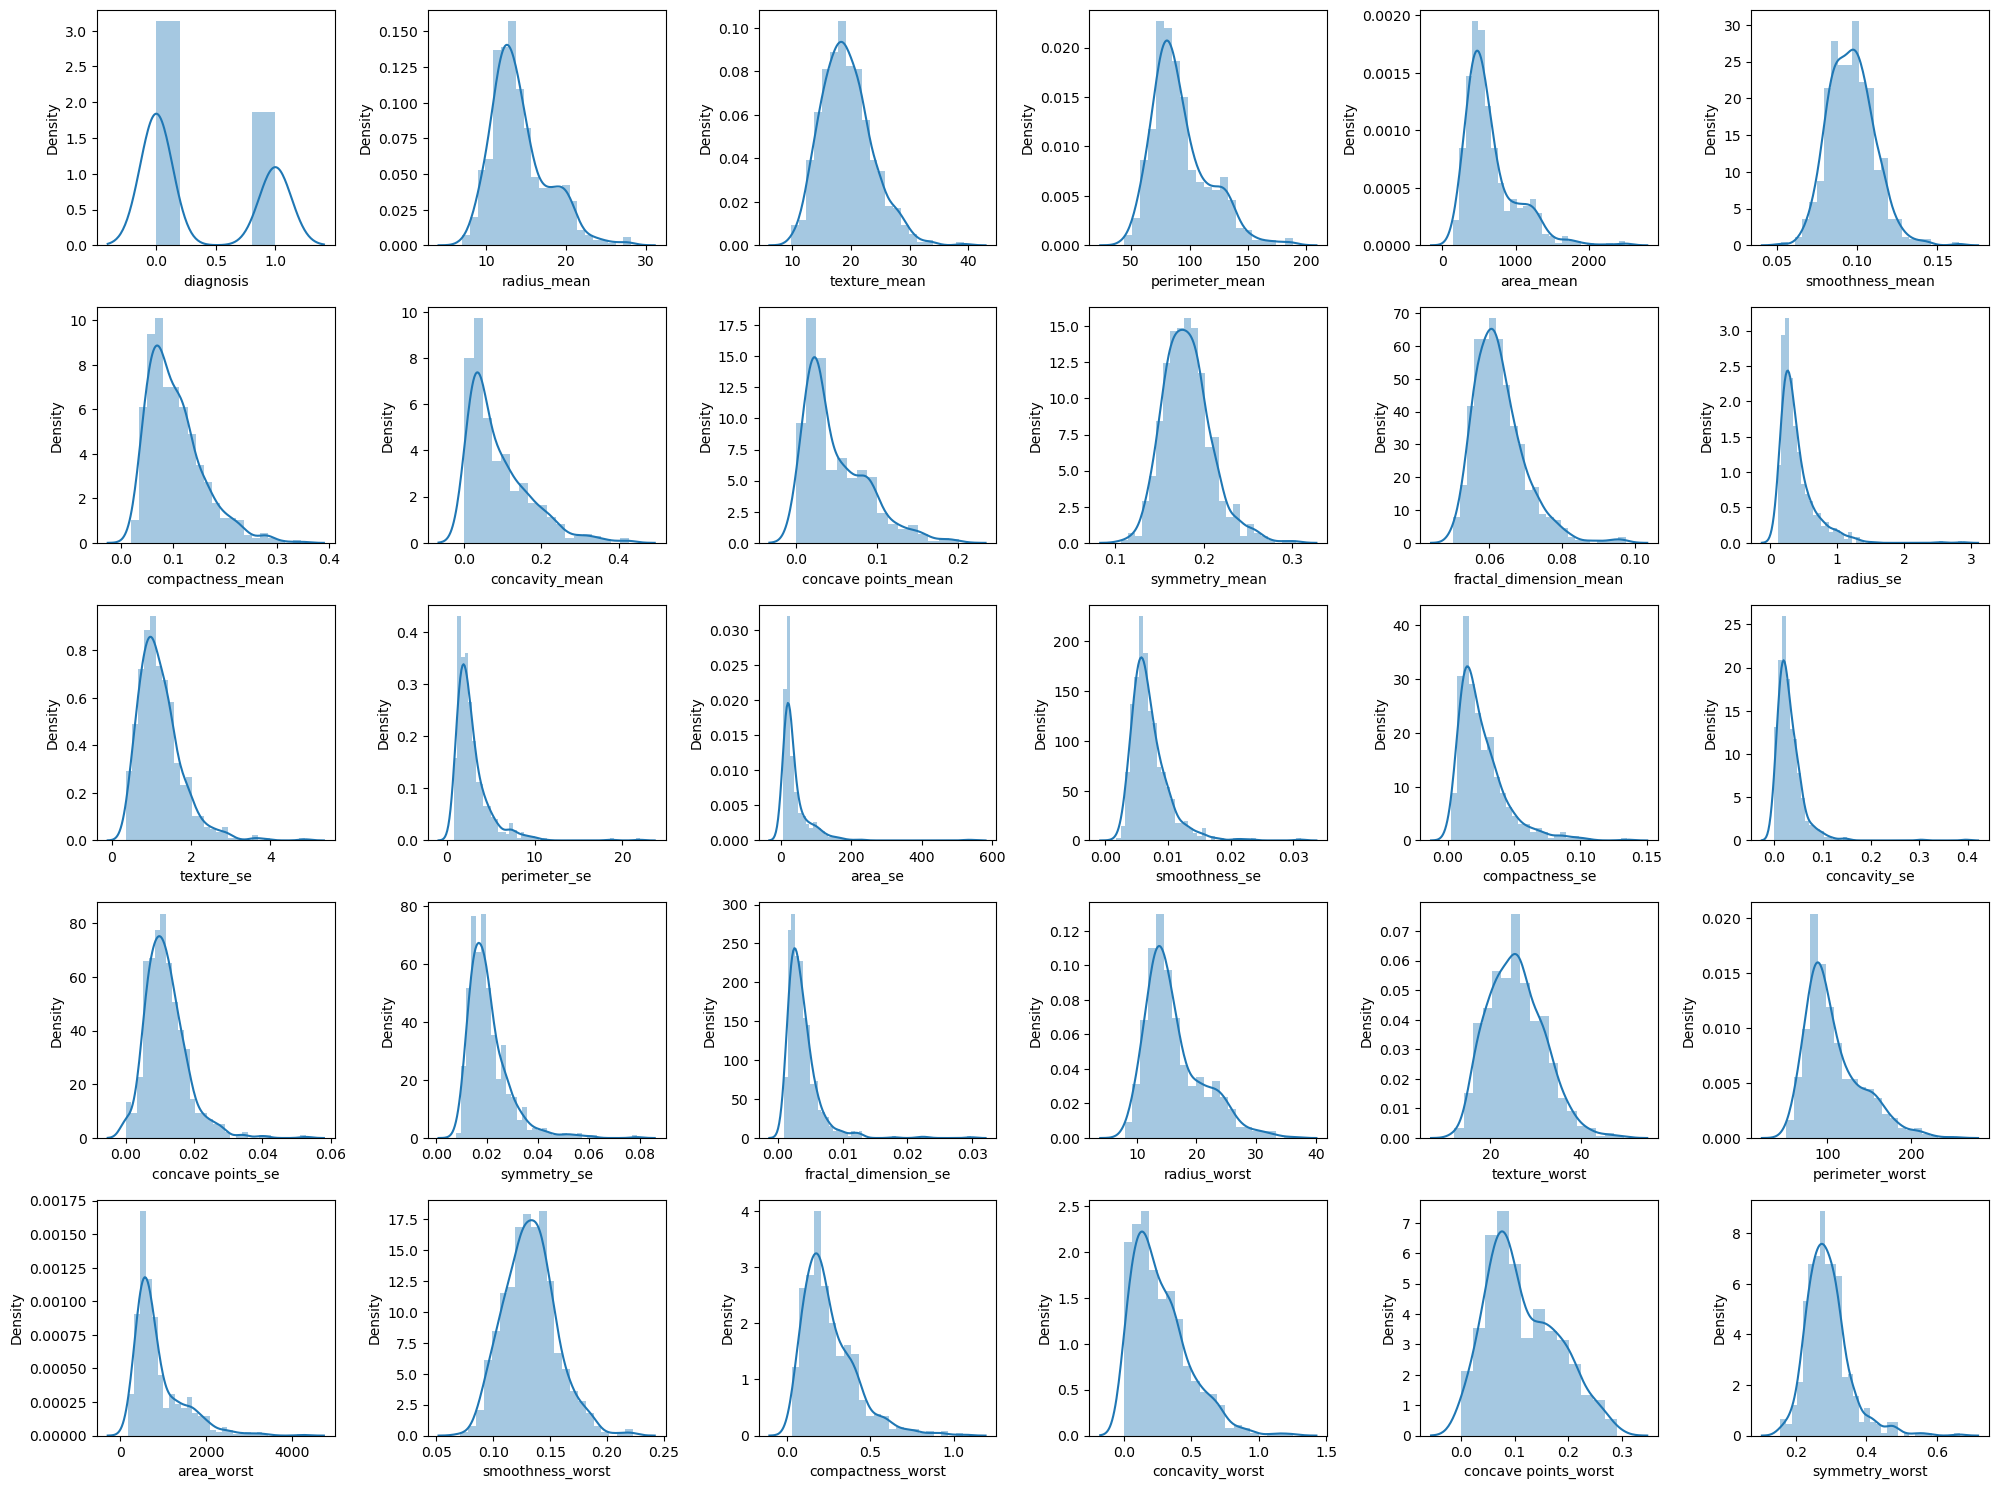

In [15]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

diagnosis
0    357
1    212
Name: count, dtype: int64


<Axes: ylabel='count'>

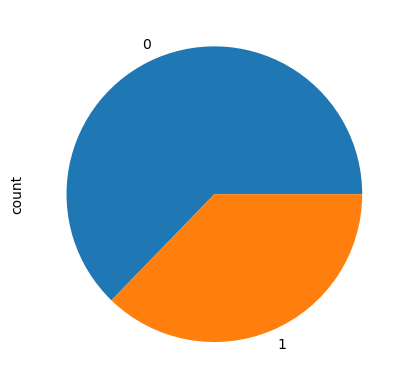

In [17]:
# Show number of malignant (M) and benign (B) values in diagnosis target feature
# Display as pie chart

print(df["diagnosis"].value_counts())

df["diagnosis"].value_counts().plot(kind="pie")

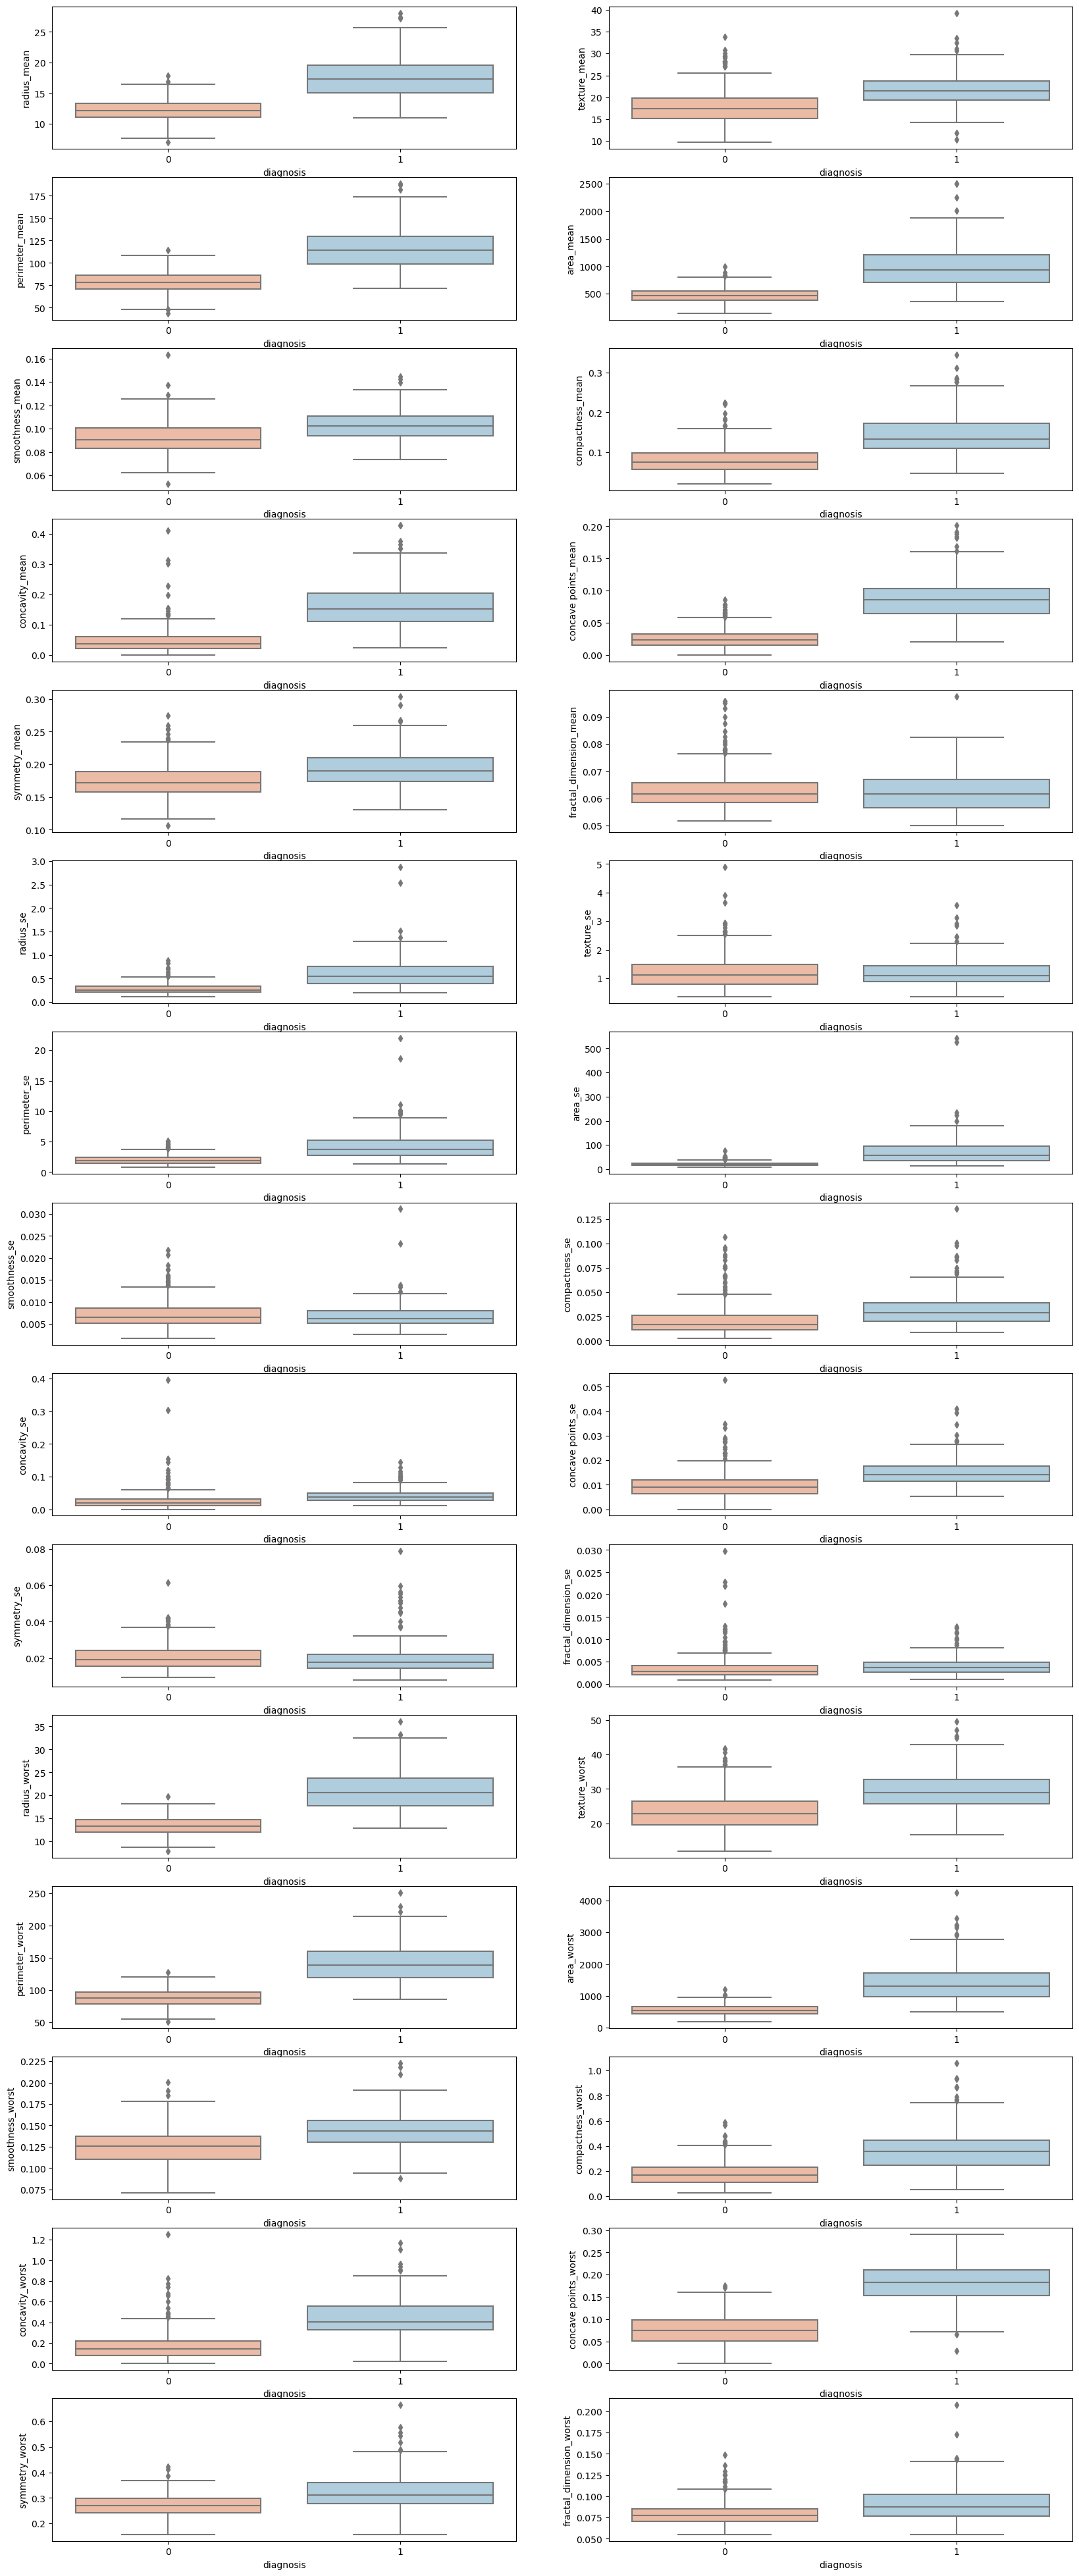

In [18]:
# checking numerical data count
nume_cols=[ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
           'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se',
           'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
           'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig=plt.figure(figsize=(20,50))
for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(15,2,i+1)
    sns.boxplot(y=df[col],x=df['diagnosis'], palette = "RdBu")

<a id="modeling"></a>
# 5️⃣ ㅣCorrelation

In [19]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [20]:
# checking correlation of independent variable with dependent variable i.e diagnosis
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

# Model Building

In [21]:
# independant variables
x=df.drop(["diagnosis"],axis=1)
y = df["diagnosis"].values.reshape(-1,1)  #target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of x : (569, 30) 
shape of y : (569, 1)


In [22]:
# Returning the classification metrics for multi_class probelm.

def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))
    
def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(metrics.accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(metrics.precision_score(y_true, y_pred, average = 'micro'), 3))
    print(f'Recall    : ', round(metrics.recall_score(y_true, y_pred, average = 'micro'), 3))
    print(f'f1        : ', round(metrics.f1_score(y_true, y_pred, average = 'micro'), 3))  

### 5.1- SUPPORT  VECTOR  MACHINE(SVM)

In [23]:
def SVM_Model(x, y, testSize):

    global x_train , x_test , y_train , y_test , y_pred
    
    rows = []
    
    for n in testSize:
        x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = n , random_state = 0)
        
        # Create SVM model
        svc=SVC(kernel='linear') 

        # fit SVM to training set
        svc.fit(x_train,y_train)

        # make predictions on test set
        y_pred=svc.predict(x_test)
            
        dataset = {'Test_size': n, 'acc': metrics.accuracy_score(y_test, y_pred), 'score': svc.score(x, y)}
        rows.append(dataset)
        evaluation3 = pd.DataFrame(rows)            
            
    return (evaluation3)   
# We want to hightlight the maximume values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [24]:
evaluation = SVM_Model(x, y, [0.1, 0.15, 0.2, 0.25, 0.3])
evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.964912,0.966608
1,0.150000,0.953488,0.964851
2,0.200000,0.956140,0.963093
3,0.250000,0.958042,0.964851
4,0.300000,0.959064,0.963093


In [25]:
#split X and y in training and test set in 90:10 ratio
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 0)
print('shape of x_train :',x_train.shape)
print('shape of y_train :',y_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_test :',y_test.shape)

shape of x_train : (512, 30)
shape of y_train : (512, 1)
shape of x_test : (57, 30)
shape of y_test : (57, 1)


In [26]:
# Create SVM model
svm=SVC(kernel='linear',random_state = 1) 

svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)

### Evaluation

In [27]:
Report(y_test , y_pred)

Accuracy : 96.49122807017544% 

Confusion Matrix : 

[[33  2]
 [ 0 22]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.92      1.00      0.96        22

    accuracy                           0.96        57
   macro avg       0.96      0.97      0.96        57
weighted avg       0.97      0.96      0.97        57



In [28]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9635549872122762


In [29]:
print('Train')
multi_class_metrics(y_train, svm.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, svm.predict(x_test))

Train
Accuracy  :  0.967
Precision :  0.967
Recall    :  0.967
f1        :  0.967

Test
Accuracy  :  0.965
Precision :  0.965
Recall    :  0.965
f1        :  0.965


- After applying sklearn library,first model has 0.96 train accuracy 

- But how can we increase these scores? let'snapply gridsearch method

### MODEL WITH GRIDSEARCHCV

- To apply svm algorithm firstly I used GridSearchCV method to tune parameters. Some parameters are given below. 

In [30]:

kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [31]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,  param_grid=dict(kernel=kernel,
                                                         gamma=gamma,
                                                         decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9589377498572244
best param:  {'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


45
45


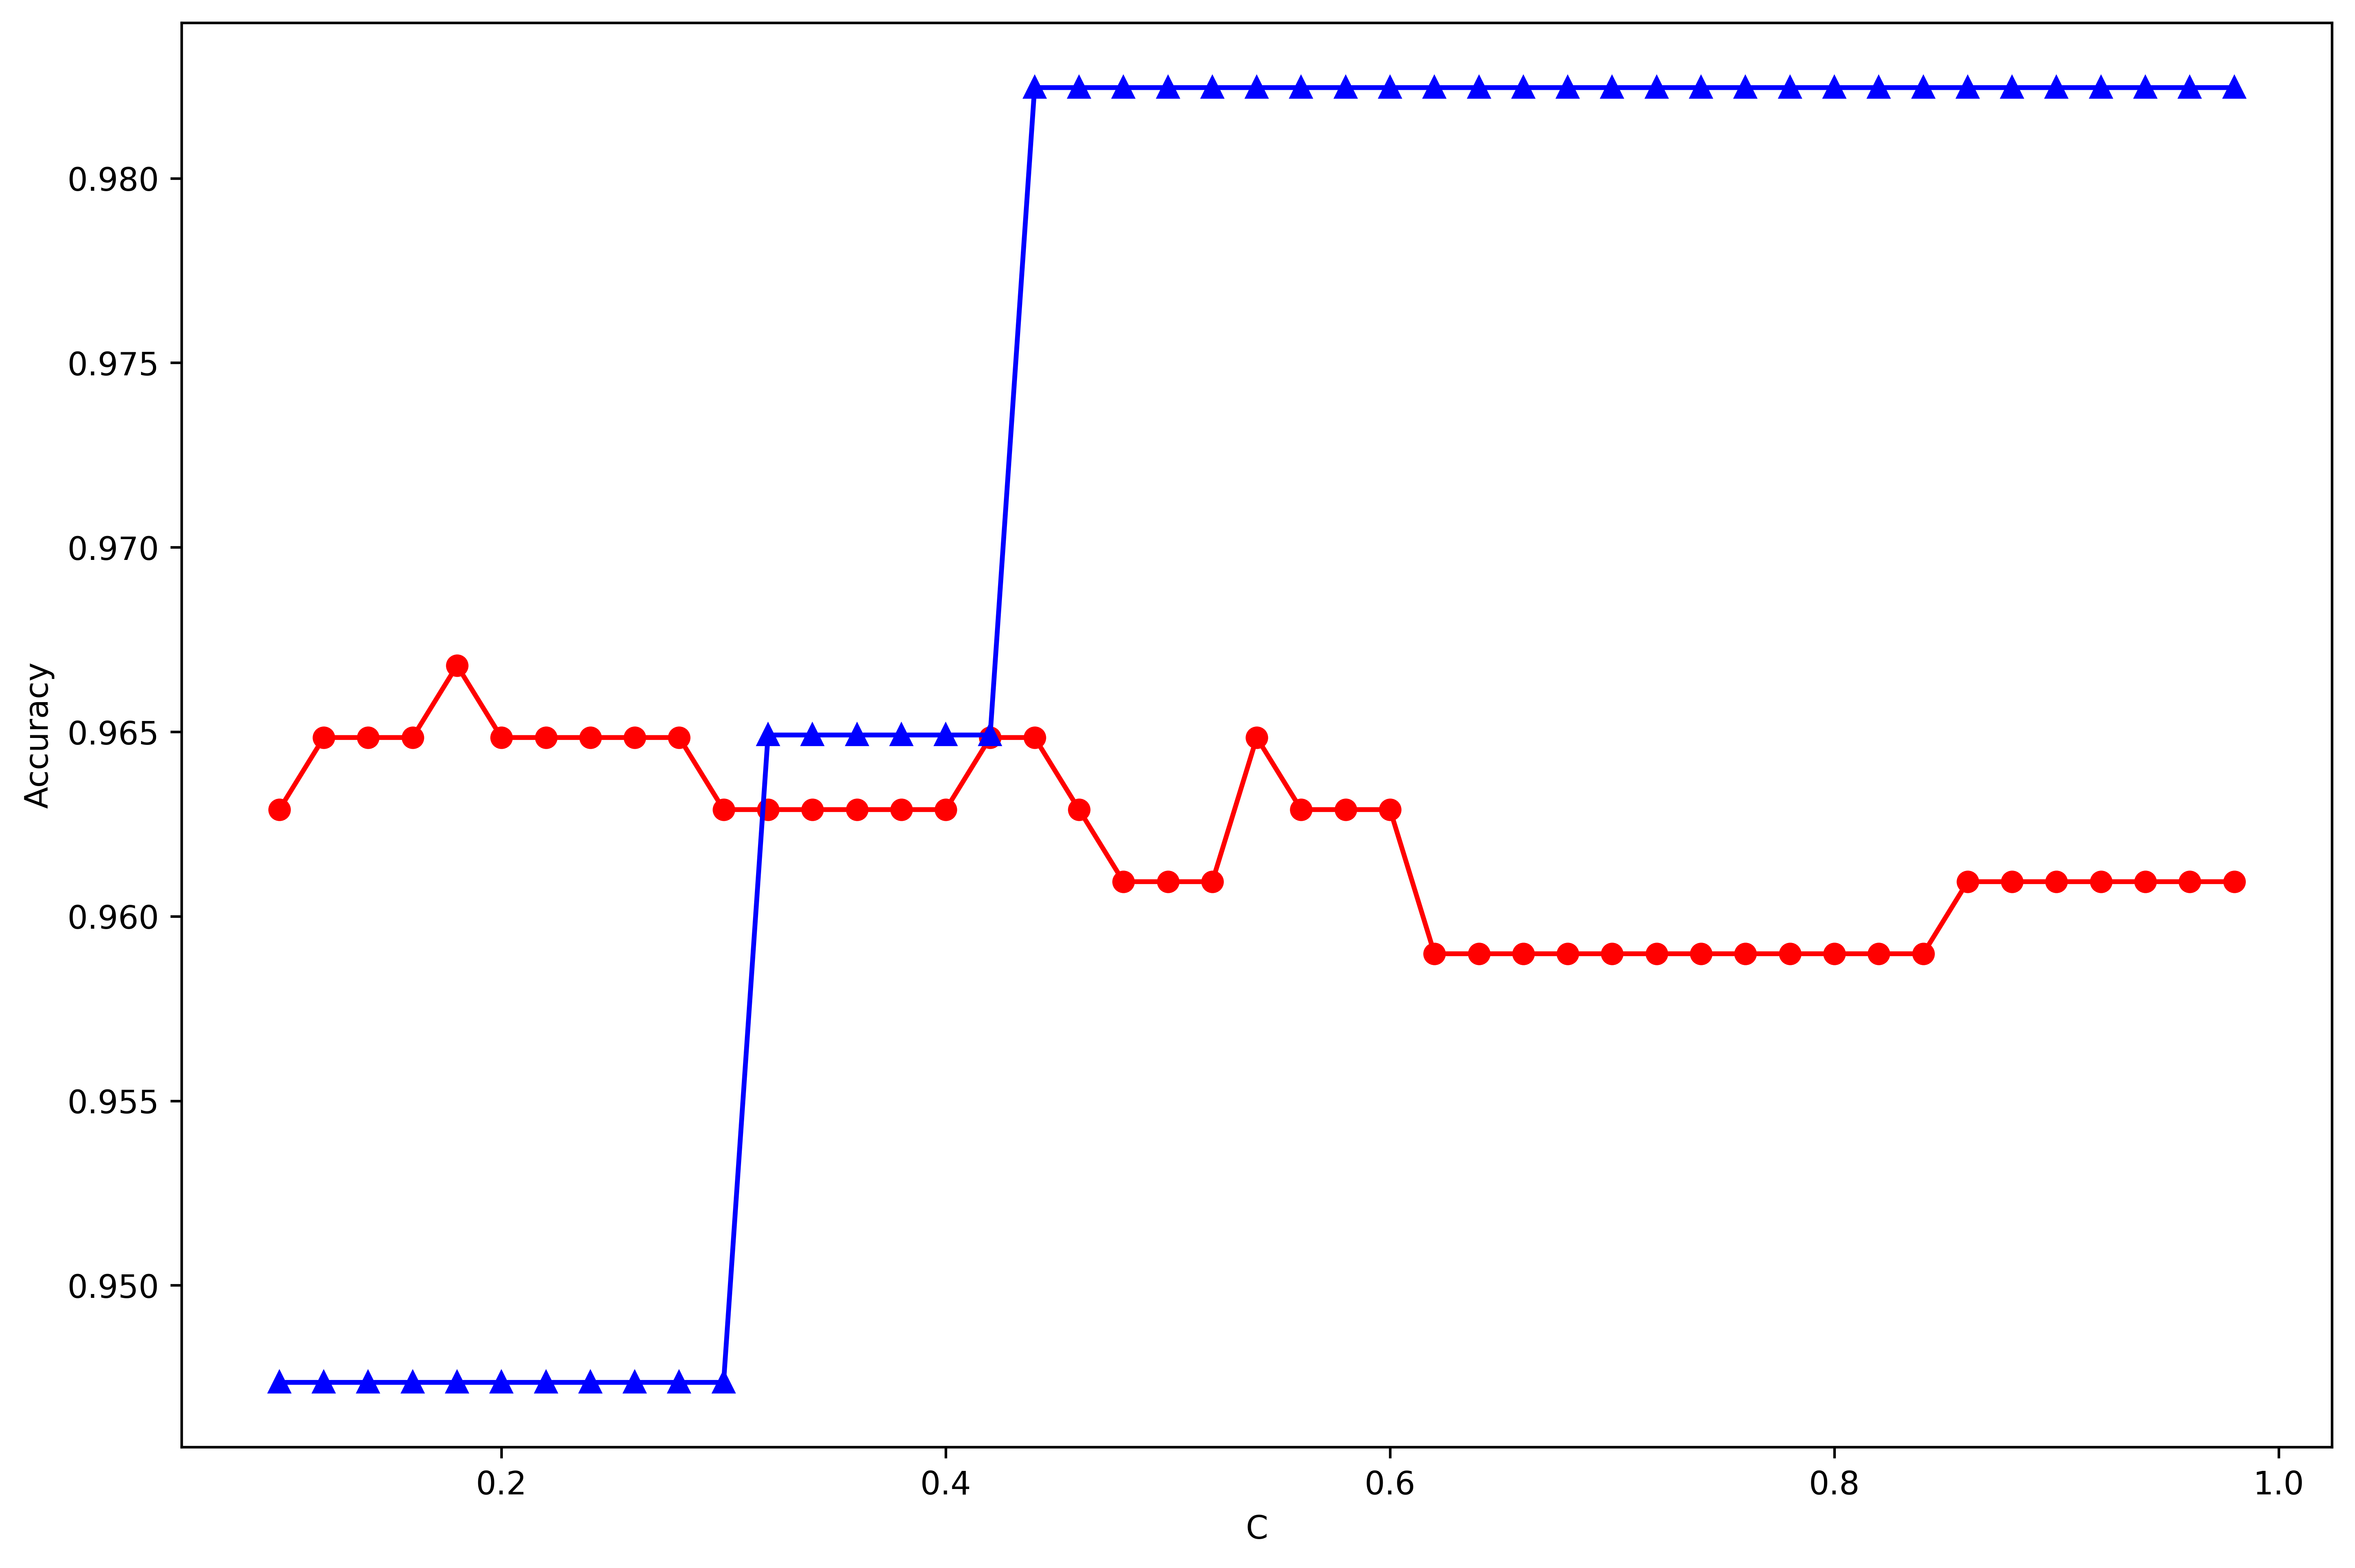

In [32]:
train_score, test_score = [], []
x = df.drop('diagnosis', axis=1)
y = df['diagnosis'].values.reshape(-1, 1) #Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True, random_state = 1)

for i in np.arange(0.1,1,0.02):
    svm = SVC(random_state = 1, kernel = 'linear', decision_function_shape = 'ovo', C = i)
    svm.fit(x_train, y_train)
    train_score.append(svm.score(x_train, y_train))
    test_score.append(svm.score(x_test, y_test))

print(len(train_score))
print(len(test_score))

plt.figure(figsize = (12, 8), dpi = 600)
plt.plot(np.arange(0.1, 1, 0.02), train_score, marker = 'o', color = 'red', label = 'Train')
plt.plot(np.arange(0.1, 1, 0.02), test_score, marker = '^', color = 'blue', label = 'Test')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

*Regarding the plot above, model with "linear" kernel performs best when "C" is equal to 0.5*

Now lets build the model with the best parameters we have found with the Gridsearch method.

In [33]:
svm1=SVC(C=0.5,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)

### Evaluation

In [34]:
Report(y_test , y_pred)

Accuracy : 98.24561403508771% 

Confusion Matrix : 

[[34  0]
 [ 1 22]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        23

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



In [35]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9816425120772947


In [36]:
print('Train')
multi_class_metrics(y_train, svm.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, svm.predict(x_test))

Train
Accuracy  :  0.961
Precision :  0.961
Recall    :  0.961
f1        :  0.961

Test
Accuracy  :  0.982
Precision :  0.982
Recall    :  0.982
f1        :  0.982


### - After applying grid search increase score.

In [37]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


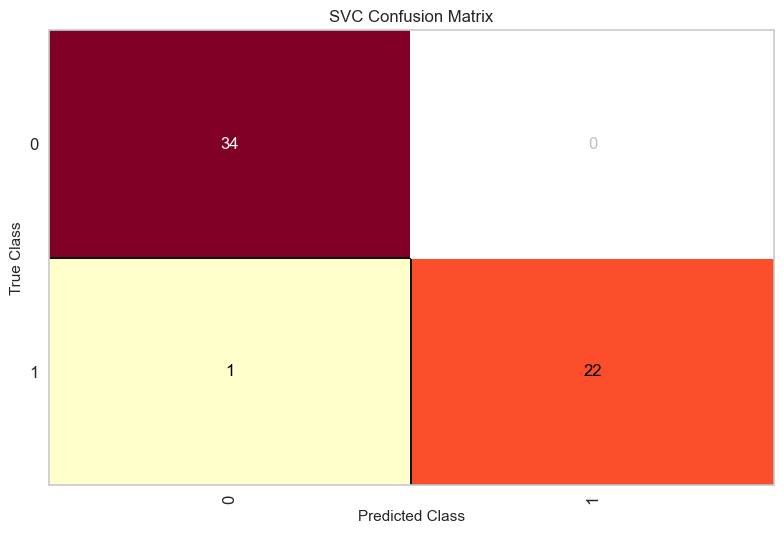

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm1, classes=[0,1])


cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

### - Accuracy of SVM model = 98.25%

### K-Nearest Neighbour

In [39]:
# independant variables
x=df.drop(["diagnosis"],axis=1)
y = df["diagnosis"].values.reshape(-1,1)  #target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of x : (569, 30) 
shape of y : (569, 1)


In [40]:
#split X and y in training and test set in 75:25 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [41]:
k=20   #1 to 20
Acc=np.zeros((k))
for i in range (1, k+1):
    KNN= KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train.ravel())
    y_pred=KNN.predict (x_test)
    Acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    
Acc

array([0.91608392, 0.93706294, 0.92307692, 0.93706294, 0.93706294,
       0.95104895, 0.94405594, 0.95804196, 0.95804196, 0.95804196,
       0.95804196, 0.95804196, 0.95804196, 0.95804196, 0.95804196,
       0.95804196, 0.95804196, 0.95804196, 0.95804196, 0.95804196])

In [42]:
print(np.max(Acc))
print(np.min(Acc))

0.958041958041958
0.916083916083916


### MODEL WITH GRIDSEARCHCV

In [43]:
parametrs={'n_neighbors': range(1,50)}
grid_kn= GridSearchCV(estimator=KNN ,  #model
                       param_grid=parametrs, #range k
                       scoring='accuracy',#strategy to evaluate the performance
                        #of the csoss_validation model on the test set
                       cv=10,   # cross_validation generator
                       verbose=1,  #Time of calculate
                       n_jobs=-1)  # help to CPU
grid_kn.fit(x_train,y_train.ravel())

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=20), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [44]:
grid_kn.best_params_

{'n_neighbors': 7}

In [45]:
#split X and y in training and test set in 70:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [46]:
k=6
KNN= KNeighborsClassifier(n_neighbors=k)
KNN.fit(x_train,y_train.ravel())
y_pred=KNN.predict (x_test)

### Evaluation

In [47]:
Report(y_test , y_pred)

Accuracy : 95.6140350877193% 

Confusion Matrix : 

[[65  2]
 [ 3 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [48]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9545997610513739


In [49]:
print('Train')
multi_class_metrics(y_train, svm.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, svm.predict(x_test))

Train
Accuracy  :  0.963
Precision :  0.963
Recall    :  0.963
f1        :  0.963

Test
Accuracy  :  0.965
Precision :  0.965
Recall    :  0.965
f1        :  0.965


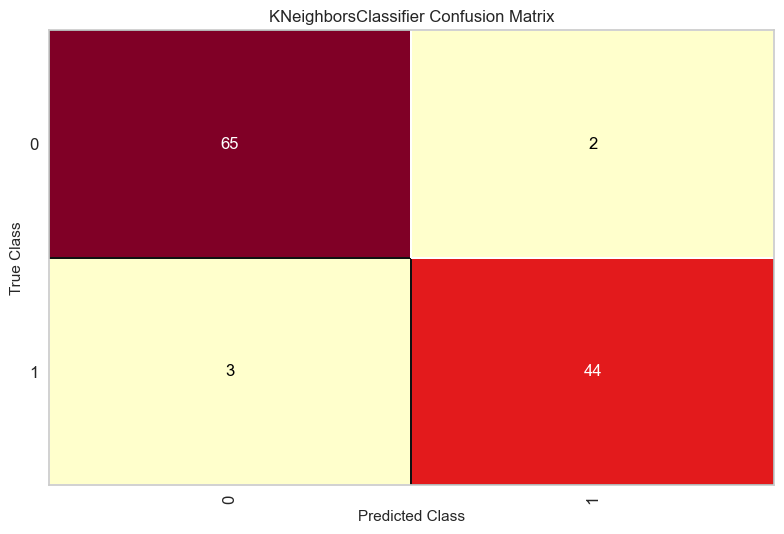

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [50]:
cm = ConfusionMatrix(
    KNN, classes=[0,1])


cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

### Conclusions
We used SVM and KNN algorithms to predict whether an instance of a breast tumor is benign or malignant. In the process, we created models with default parameters and then used techniques to optimize them.

Due to the medical nature of the dataset, we stressed on the importance of having high accuracy but also low false negative (FN) predictions, as this would save lives. We conclude that the SVM model is the optimal classification model for the Wisconsin breast cancer dataset (at least out of the models considered in this notebook), with an average accuracy of 0.98, a Malignant precision of 0.98 and only 1 FN prediction.